Imax = 10675 Dmax = 4808

N, Delta, mu 4706097 1508.364423076923 0.0003205128205128205


 R0 first part
0.08936533136807559
0.030266626702819287
0.0003185960705559925
0.34993582388341177
0.009724532368970602
 R0 first part all
0.47961091039383325

 R0 second part
0.12849658123651794
0.025568197286858163
0.0002691389188090333
0.6503500438093154
0.008214947921801878
 R0 second part all
0.8128989091733024

       S*              E*               I*               H*
       R*              D*               B*               P*
[3.64105319e+06 3.66927517e+02 3.41167359e+02 3.80432397e+02
 1.04451519e+06 6.23079983e+02 6.55873666e+02 1.19125358e+01]

R0 =  1.2925098195671356 , (R0-1)/R0 =  0.22631148726212216
second derivative
[ -39.13050054  446.44138586 -844.93413961  433.29035079    0.
    4.33290351    0.            2.62600213]
eigenvalues
[-3.20512821e-04+0.j         -1.44590913e+00+0.j
 -9.59331556e-01+0.65691683j -9.59331556e-01-0.65691683j
  4.73182167e-02+0.j         -1.09532970e-02+0

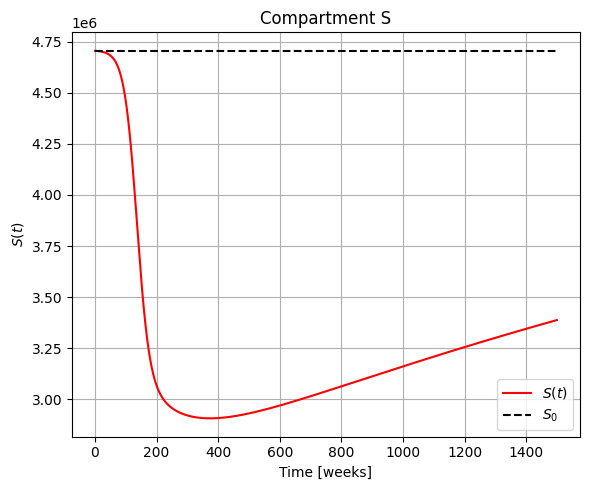

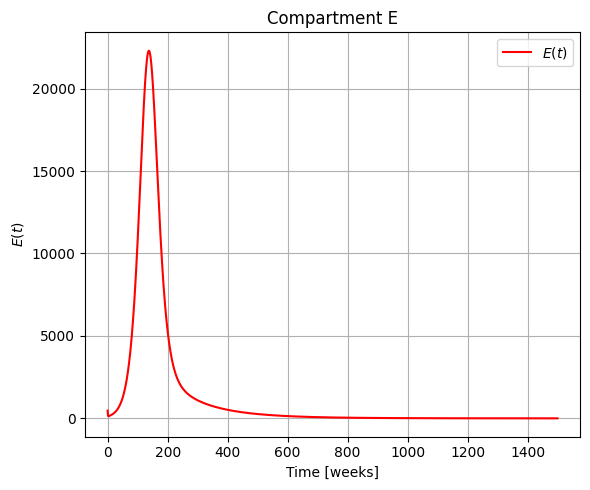

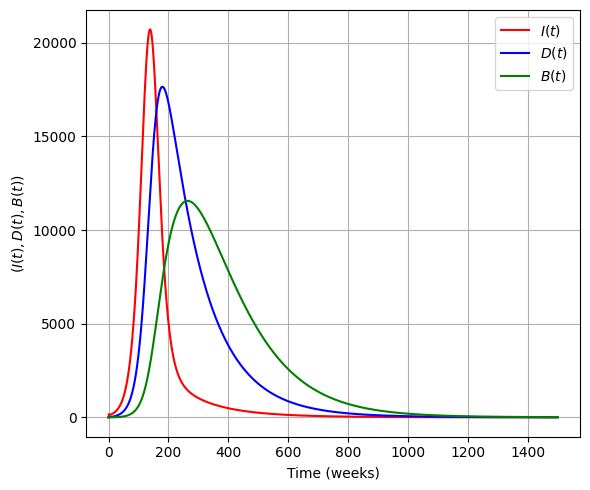

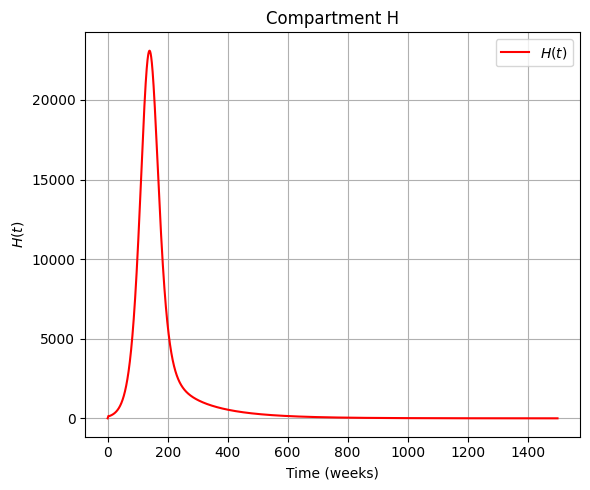

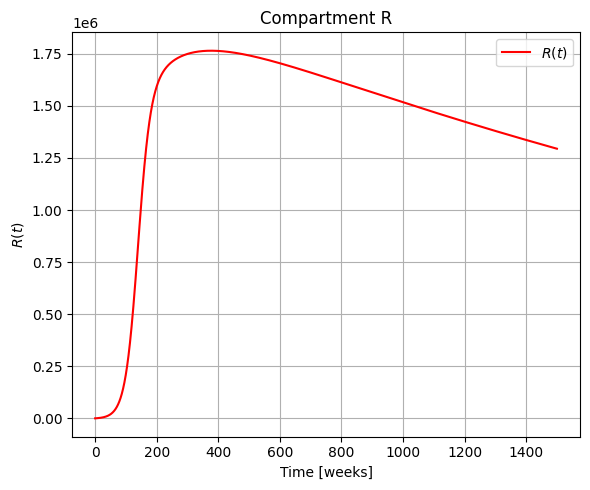

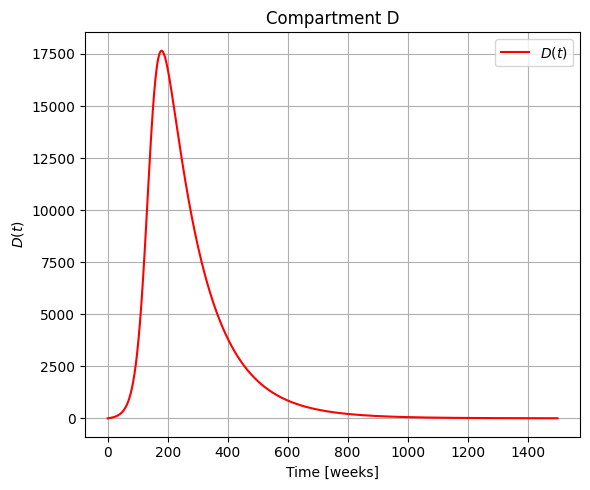

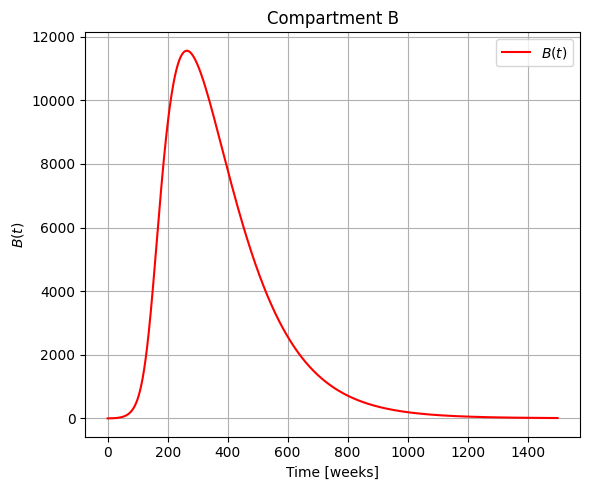

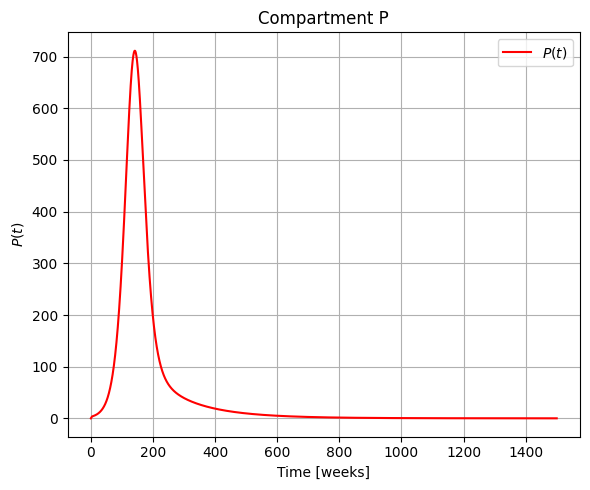

In [3]:
# PARAMETER ESTIMATION USING THE LEAST SQUARE METHOD
# EBOLA VIRUS MODEL SEIHRDBP
# CODE by Ijuptil Joseph K. 07/03/2024
import numpy as np
from scipy.integrate import odeint
from scipy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd

Tend = 1500.
#Tend = 15000.
#Tend = 10000.
#Tend = 500.
#Tend = 300.

guess_params = np.zeros(17)
guess_params[0] = 0.93  # Increase delta to speed up progression to I
guess_params[1]  = 0.0000000190      # beta
guess_params[2]  = 0.0000000245      # beta_1
guess_params[3]  = 0.0000000065      # beta_2
guess_params[4]  = 0.0000000000650   # beta_3
guess_params[5] = 0.00000620         #beta_p
guess_params[6] = 0.00990            # gamma
guess_params[7]  = 0.990             # gamma_1    # very sensitve


guess_params[8]  = 0.006        # sigma
guess_params[10] = 0.00010      # d_1

guess_params[11] = 0.00750      # eta
guess_params[12] = 0.88000      # xi

guess_params[13] = 0.01000      # d change sentisive

guess_params[15] = 0.010        # eta_1
guess_params[16] = 0.50000      # alpha

guess_params[9] = 0.65*guess_params[10]      # b_1 = 0.9*d_1
guess_params[14] = 0.95*guess_params[13]      # b   = 1.1*d



mu = 1./(52*60.)
delta = guess_params[0]
gamma = guess_params[6]
gamma_1 = guess_params[7]
eta   = guess_params[11]
xi    = guess_params[12]
a1 = delta + mu
a2 = gamma + gamma_1 + mu
a3 = eta + xi + mu

# Define the system of differential equations
def ebola_model(y, t, params):
    S, E, I, H, R, D, B, P = y
    mu = 1./(52*60.)
    Delta = N*mu
    phi_p = 0.000
    # 0      1     2       3       4       5       6       7        8    9   10   11   12  13 14  15     16
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params

    Psi = beta*I + beta_1*H + beta_2*D + beta_3*B + beta_p*P
    dSdt =  Delta - (Psi + mu)*S
    dEdt = Psi*S - a1*E
    dIdt = delta*E - a2*I
    dHdt = gamma_1*I - a3*H
    dRdt = xi*H -  mu*R
    dDdt = gamma*I + eta*H - d*D
    dBdt = d*D - b*B
    dPdt = phi_p + sigma*I + eta_1*H + d_1*D + b_1*B - alpha*P

    return [dSdt, dEdt, dIdt, dHdt, dRdt, dDdt, dBdt, dPdt]

def Dfcn(y,params):
    S, E, I, H, R, D, B, P = y
    mu = 1./(52*60.)
    Delta = N*mu
    phi_p = 0.000

    # 0      1     2       3       4       5       6       7        8    9   10   11   12  13 14  15     16
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params

    dy = ebola_model(y, 0, params)
    dS, dE, dI, dH, dR, dD, dB, dP = dy

    Psi = beta*I + beta_1*H + beta_2*D + beta_3*B + beta_p*P
    dPsi = beta*dI + beta_1*dH + beta_2*dD + beta_3*dB + beta_p*dP

    ddS = -dPsi*S - (Psi + mu)*dS
    ddE = dPsi*S + Psi*dS - a1*dE
    ddI = delta*dE - a2*dI
    ddH = gamma_1*dI - a3*dH
    ddR = xi*dH - mu*dR
    ddD = gamma*dI + eta*dH - d*dD
    ddB = d*dD - b*dB
    ddP = sigma*dI + eta_1*dH + d_1*dD + b_1*dB - alpha*dP
    print('second derivative')
    print(np.array([ddS,ddE,ddI,ddH,ddR,ddD,ddB,ddP]))
    return

def Jac(y,params):
    S, E, I, H, R, D, B, P = y
    mu = 1./(52*60.)
    Delta = N*mu
    phi_p = 0.000
    # 0      1     2       3       4       5       6       7        8    9   10   11   12  13 14  15     16
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params

    Psi = beta*I + beta_1*H + beta_2*D + beta_3*B + beta_p*P
    J = np.zeros((8,8))
    J[0,0] = -(Psi + mu)
    J[0,2] = -beta*S
    J[0,3] = -beta_1*S
    J[0,5] = -beta_2*S
    J[0,6] = -beta_2*S
    J[0,7] = -beta_p*S

    J[1,0] = (Psi + mu)
    J[1,1] = -a1
    J[1,2] = beta*S
    J[1,3] = beta_1*S
    J[1,5] = beta_2*S
    J[1,6] = beta_2*S
    J[1,7] = beta_p*S

    J[2,1] = delta
    J[2,2] = -a2

    J[3,2] = gamma_1
    J[3,3] = -a3

    J[4,3] = xi
    J[4,4] = -mu

    J[5,2] = gamma
    J[5,3] = eta
    J[5,5] = -d

    J[6,5] = d
    J[6,6] = -b

    J[7,2] = sigma
    J[7,3] = eta_1
    J[7,5] = d_1
    J[7,6] = b_1
    J[7,7] = -alpha

    [v,w] = eig(J)
    print('eigenvalues')
    print(v)
    return


def ebola_R0(params):
    " computation of R_0 and the corresponding steady state solution for phi_p = 0! "
    mu = 1./(52*60.)
    Delta = N*mu
    phi_p = 0.000       # DO not alter

    # 0      1     2       3       4       5       6       7        8    9   10   11   12  13 14  15     16
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params

    a1 = delta + mu
    a2 = gamma + gamma_1 + mu
    a3 = eta + xi + mu
    print('')
    print(' R0 first part')
    print(( beta  ) * Delta*delta/(mu*a1*a2))
    print(( beta_2*gamma/d  ) * Delta*delta/(mu*a1*a2))
    print(( beta_3*gamma/b  ) * Delta*delta/(mu*a1*a2))
    print(( beta_p*sigma/alpha ) * Delta*delta/(mu*a1*a2))
    print(( beta_p*gamma/alpha*(d_1/d+b_1/b) ) * Delta*delta/(mu*a1*a2))
    print(' R0 first part all')
    print(( beta + beta_2*gamma/d + beta_3*gamma/b + beta_p*sigma/alpha + beta_p*gamma/alpha*(d_1/d+b_1/b) ) * Delta*delta/(mu*a1*a2) )
    print('')

    print(' R0 second part')
    print(( beta_1  ) *  Delta*delta*gamma_1/(mu*a1*a2*a3) )
    print(( beta_2*eta/d ) *  Delta*delta*gamma_1/(mu*a1*a2*a3) )
    print(( beta_3*eta/b ) *  Delta*delta*gamma_1/(mu*a1*a2*a3) )
    print(( beta_p*eta_1/alpha ) *  Delta*delta*gamma_1/(mu*a1*a2*a3) )
    print(( beta_p*eta/alpha*(d_1/d+b_1/b) ) *  Delta*delta*gamma_1/(mu*a1*a2*a3) )
    print(' R0 second part all')
    print(( beta_1 + beta_2*eta/d + beta_3*eta/b + beta_p*eta_1/alpha + beta_p*eta/alpha*(d_1/d+b_1/b) ) *  Delta*delta*gamma_1/(mu*a1*a2*a3) )
    print('')
    R0 = ( beta + beta_2*gamma/d + beta_3*gamma/b + beta_p*sigma/alpha + beta_p*gamma/alpha*(d_1/d+b_1/b) ) * Delta*delta/(mu*a1*a2) + \
         ( beta_1 + beta_2*eta/d + beta_3*eta/b + beta_p*eta_1/alpha + beta_p*eta/alpha*(d_1/d+b_1/b) ) *  Delta*delta*gamma_1/(mu*a1*a2*a3)

    QS = Delta/(mu*R0)
    QE = Delta*(R0-1.)/(a1*R0)
    QI = Delta*delta*(R0-1.)/(a1*a2*R0)
    QH = Delta*delta*gamma_1*(R0-1.)/(a1*a2*a3*R0)
    QR = Delta*delta*gamma_1*xi*(R0-1.)/(mu*a1*a2*a3*R0)
    QD = (gamma/a2 + eta*gamma_1/(a2*a3))*Delta*delta*(R0-1.)/(d*a1*R0)
    QB = (gamma/a2 + eta*gamma_1/(a2*a3))*Delta*delta*(R0-1.)/(b*a1*R0)
    QP = (sigma/a2 + eta_1*gamma_1/(a2*a3) + (d_1/d+b_1/b)*(gamma/a2 + eta*gamma_1/(a2*a3))) * Delta*delta*(R0-1.)/(alpha*a1*R0)
    print('       S*              E*               I*               H*')
    print('       R*              D*               B*               P*')
    QQ = np.array([QS,QE,QI,QH,QR,QD,QB,QP])
    print(QQ)
    print('')
    return R0


Imax = 10675
Dmax = 4808
print('Imax =',Imax,'Dmax =',Dmax)
print('')

# Population
N = 4706097
mu = 1./(52*60.)
Delta = N*mu
print('N, Delta, mu',N,Delta,mu)
print('')

RR0 = ebola_R0(guess_params)
print('R0 = ',RR0,', (R0-1)/R0 = ',(RR0-1)/RR0)
if RR0 < 1.:
    exit(1)

tt = np.linspace(0.,Tend, 35001)

# Assign values to the y0 array
#y0 = np.array([0.980*N,0.015*N,0.005*N,0.0000*N,0.0000*N,0.00000*N,0.00000*N,0.])
S0 = 0.9999*N
I0 = 1./3.*(N - S0)
E0 = N - S0
I0 = 0.
#y0 = np.array([S0,E0,I0,0.0000*N,0.0000*N,0.00000*N,0.00000*N,0.])
y0 = np.array([S0,E0,I0,0.0000*N,0.0000*N,0.00000*N,0.00000*N,0.])
Dfcn(y0,guess_params)
Jac(y0,guess_params)
print('')

t1 = np.linspace(0.,1500., 4001)
sol = odeint(ebola_model, y0, t1, args=(guess_params,))
y1 = sol[-1,:]
Jac(y1,guess_params)
print('')

sol = odeint(ebola_model, y0, tt, args=(guess_params,))
print('')
print('Parameter:')
print(guess_params)
print('')

if RR0 < 1.0:
    print('Alarm: R0 =',RR0)

plt.figure(figsize=(6, 5))
plt.plot(tt, sol[:, 0], 'r-', label='$S(t)$')
plt.plot([0,tt[-1]], [N, N], 'k--', label='$S_0$')
plt.xlabel('Time [weeks]')
plt.ylabel('$S(t)$')
plt.title('Compartment S')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.figure(figsize=(6, 5))
plt.plot(tt, sol[:, 1], 'r-', label='$E(t)$')
plt.xlabel('Time [weeks]')
plt.ylabel('$E(t)$')
plt.title('Compartment E')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.figure(figsize=(6, 5))
plt.plot(tt, sol[:, 2], 'r-', label='$I(t)$')
plt.plot(tt, sol[:, 5], 'b-', label='$D(t)$')
plt.plot(tt, sol[:, 6], 'g-', label='$B(t)$')
#plt.ylim([0,15000])
plt.xlabel('Time (weeks)')
plt.ylabel('($I(t), D(t), B(t))$')
#plt.title('Compartment I')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the figure
#plt.savefig('plot.png')  # Save as PNG file

plt.figure(figsize=(6, 5))
plt.plot(tt, sol[:, 3], 'r-', label='$H(t)$')
plt.xlabel('Time (weeks)')
plt.ylabel('$H(t)$')
plt.title('Compartment H')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.figure(figsize=(6, 5))
plt.plot(tt, sol[:, 4], 'r-', label='$R(t)$')
plt.xlabel('Time [weeks]')
plt.ylabel('$R(t)$')
plt.title('Compartment R')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.figure(figsize=(6, 5))
plt.plot(tt, sol[:, 5], 'r-', label='$D(t)$')
plt.xlabel('Time [weeks]')
plt.ylabel('$D(t)$')
plt.title('Compartment D')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.figure(figsize=(6, 5))
plt.plot(tt, sol[:, 6], 'r-', label='$B(t)$')
plt.xlabel('Time [weeks]')
plt.ylabel('$B(t)$')
plt.title('Compartment B')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.figure(figsize=(6, 5))
plt.plot(tt, sol[:, 7], 'r-', label='$P(t)$')
plt.xlabel('Time [weeks]')
plt.ylabel('$P(t)$')
plt.title('Compartment P')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



R0 for phi_b = 0: 0.0002746650229127726
R0 for phi_b = 0.1: 0.0002746650229127726
R0 for phi_b = 0.5: 0.0002746650229127726
R0 for phi_b = 1: 0.0002746650229127726


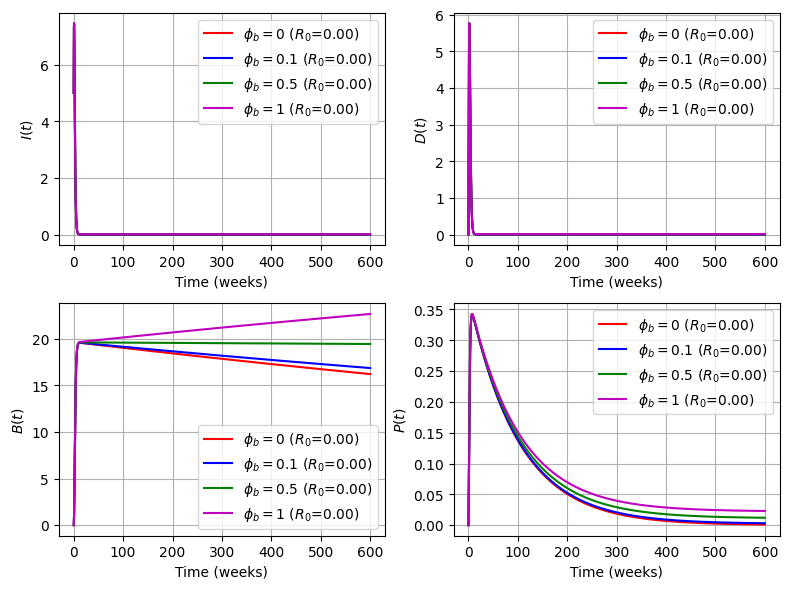

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Initial conditions and parameters
#N = 4706097
N = 1000
mu = 1./(52*60.)
Delta = N*mu

guess_params = np.array([0.93, 0.0000000190, 0.0000000245, 0.0000000065, 0.0000000000750,
                         0.00000620, 0.00990, 0.990, 0.006, 0.000065, 0.00010, 0.00750,
                         0.88000, 0.01000, 0.00950, 0.010, 0.50000])

a1 = guess_params[0] + mu
a2 = guess_params[6] + guess_params[7] + mu
a3 = guess_params[11] + guess_params[12] + mu

def ebola_R0(params, phi_b):
    mu = 1./(52*60.)
    Delta = N*mu

    # Unpack parameters
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params

    a1 = delta + mu
    a2 = gamma + gamma_1 + mu
    a3 = eta + xi + mu

    # First part
    R0_part1 = (beta + beta_2 * gamma / d + beta_3 * gamma / b + beta_p * sigma / alpha + beta_p * gamma / alpha * (d_1 / d + b_1 / b)) * Delta * delta / (mu * a1 * a2)

    # Second part
    R0_part2 = (beta_1 + beta_2 * eta / d + beta_3 * eta / b + beta_p * eta_1 / alpha + beta_p * eta / alpha * (d_1 / d + b_1 / b)) * Delta * delta * gamma_1 / (mu * a1 * a2 * a3)

    R0 = R0_part1 + R0_part2
    return R0

# Compute R0 for each phi_b value
phi_b_values = [0, 0.1, 0.5, 1]
R0_values = []

for phi_b in phi_b_values:
    R0 = ebola_R0(guess_params, phi_b)
    R0_values.append(R0)
    print(f'R0 for phi_b = {phi_b}: {R0}')

# Plot the compartments I, D, B, and P for each phi_b value
def ebola_model(y, t, params, phi_b):
    S, E, I, H, R, D, B, P = y
    mu = 1./(52*60.)
    Delta = N*mu

    # Unpack parameters
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params

    Psi = beta*I + beta_1*H + beta_2*D + beta_3*B + beta_p*P
    dSdt =  Delta - (Psi + mu)*S
    dEdt = Psi*S - a1*E
    dIdt = delta*E - a2*I
    dHdt = gamma_1*I - a3*H
    dRdt = xi*H -  mu*R
    dDdt = gamma*I + eta*H - d*D
    dBdt = d*D - b*B
    dPdt = phi_b + sigma*I + eta_1*H + d_1*D + b_1*B - alpha*P

    return [dSdt, dEdt, dIdt, dHdt, dRdt, dDdt, dBdt, dPdt]

# Time vector
#Tend = 1500
Tend = 600
tt = np.linspace(0, Tend, 35001)

# Initial conditions
y0 = np.array([0.980*N, 0.015*N, 0.005*N, 0, 0, 0, 0, 0])
compartments = ['I', 'D', 'B', 'P']
colors = ['r', 'b', 'g', 'm']
labels = ['$I(t)$', '$D(t)$', '$B(t)$', '$P(t)$']

plt.figure(figsize=(8, 6))

for i, phi_b in enumerate(phi_b_values):
    sol = odeint(ebola_model, y0, tt, args=(guess_params, phi_b))

    for j, compartment in enumerate(compartments):
        plt.subplot(2, 2, j+1)
        plt.plot(tt, sol[:, 2 + j], colors[i], label=f'$\phi_b={phi_b}$ ($R_0$={R0_values[i]:.2f})')
        plt.xlabel('Time (weeks)')
        plt.ylabel(labels[j])
        #plt.title(f'Compartment {labels[j]}')
        plt.legend()
        plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
## VARYING beta on IDBP

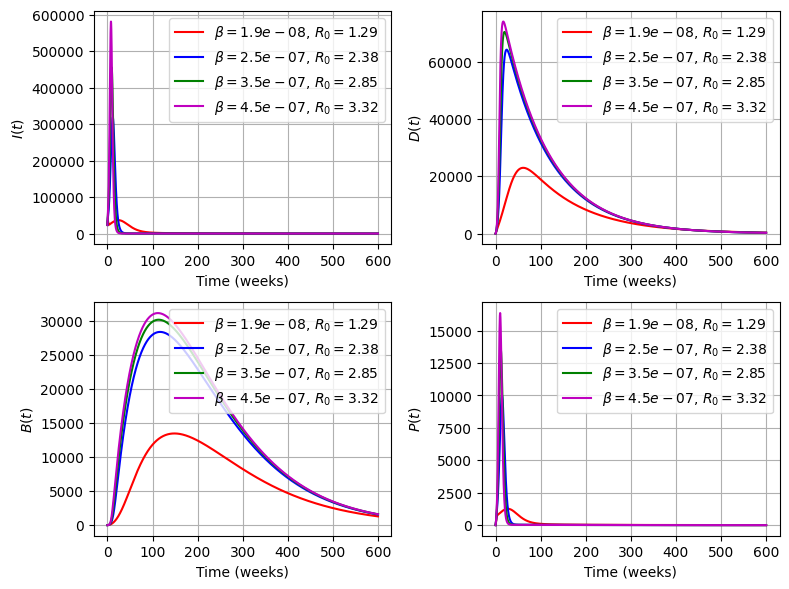

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters
guess_params = np.zeros(17)
guess_params[0] = 0.93
guess_params[1] = 0.0000000190
guess_params[2] = 0.0000000245
guess_params[3] = 0.0000000065
guess_params[4] = 0.0000000000650
guess_params[5] = 0.00000620
guess_params[6] = 0.00990
guess_params[7] = 0.990
guess_params[8] = 0.006
guess_params[10] = 0.00010
guess_params[11] = 0.00750
guess_params[12] = 0.88000
guess_params[13] = 0.01000
guess_params[15] = 0.010
guess_params[16] = 0.50000
guess_params[9] = 0.65 * guess_params[10]
guess_params[14] = 0.95 * guess_params[13]

N = 4706097
mu = 1./(52*60.)
Delta = N * mu

# Time span
Tend = 1500.
Tend = 600.
tt = np.linspace(0., Tend, 35001)

# Initial conditions
y0 = np.array([0.980 * N, 0.015 * N, 0.005 * N, 0.0000 * N, 0.0000 * N, 0.00000 * N, 0.00000 * N, 0.])

# Differential equations
def ebola_model(y, t, params):
    S, E, I, H, R, D, B, P = y
    mu = 1./(52*60.)
    Delta = N * mu
    phi_p = 0.000
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params
    Psi = beta * I + beta_1 * H + beta_2 * D + beta_3 * B + beta_p * P
    dSdt = Delta - (Psi + mu) * S
    dEdt = Psi * S - (delta + mu) * E
    dIdt = delta * E - (gamma + gamma_1 + mu) * I
    dHdt = gamma_1 * I - (eta + xi + mu) * H
    dRdt = xi * H - mu * R
    dDdt = gamma * I + eta * H - d * D
    dBdt = d * D - b * B
    dPdt = phi_p + sigma * I + eta_1 * H + d_1 * D + b_1 * B - alpha * P
    return [dSdt, dEdt, dIdt, dHdt, dRdt, dDdt, dBdt, dPdt]

# Function to compute R_0
def compute_R0(params):
    mu = 1./(52*60.)
    Delta = N * mu
    phi_p = 0.000
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params
    a1 = delta + mu
    a2 = gamma + gamma_1 + mu
    a3 = eta + xi + mu
    R0 = (beta + beta_2 * gamma / d + beta_3 * gamma / b + beta_p * sigma / alpha +
          beta_p * gamma / alpha * (d_1 / d + b_1 / b)) * Delta * delta / (mu * a1 * a2) + \
         (beta_1 + beta_2 * eta / d + beta_3 * eta / b + beta_p * eta_1 / alpha +
          beta_p * eta / alpha * (d_1 / d + b_1 / b)) * Delta * delta * gamma_1 / (mu * a1 * a2 * a3)
    return R0

# Values for beta
beta_values = [0.0000000190, 0.000000250, 0.00000035, 0.00000045]
compartments = ['I(t)', 'D(t)', 'B(t)', 'P(t)']
compartment_indices = [2, 5, 6, 7]
colors = ['r', 'b', 'g', 'm']
labels = ['$I(t)$', '$D(t)$', '$B(t)$', '$P(t)$']

results = {}
R0_values = {}
for beta in beta_values:
    guess_params[1] = beta
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    results[beta] = sol
    R0_values[beta] = compute_R0(guess_params)

# Plot results
plt.figure(figsize=(8, 6))
for i, (compartment, index) in enumerate(zip(compartments, compartment_indices)):
    plt.subplot(2, 2, i + 1)
    for beta, color in zip(beta_values, colors):
        plt.plot(tt, results[beta][:, index], color, label=f'$\\beta={beta:.1e}$, $R_0={R0_values[beta]:.2f}$')
    plt.xlabel('Time (weeks)')
    plt.ylabel(labels[i])
    #plt.title(f'Compartment {labels[i]}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
## VARYING beta2 on IDBP

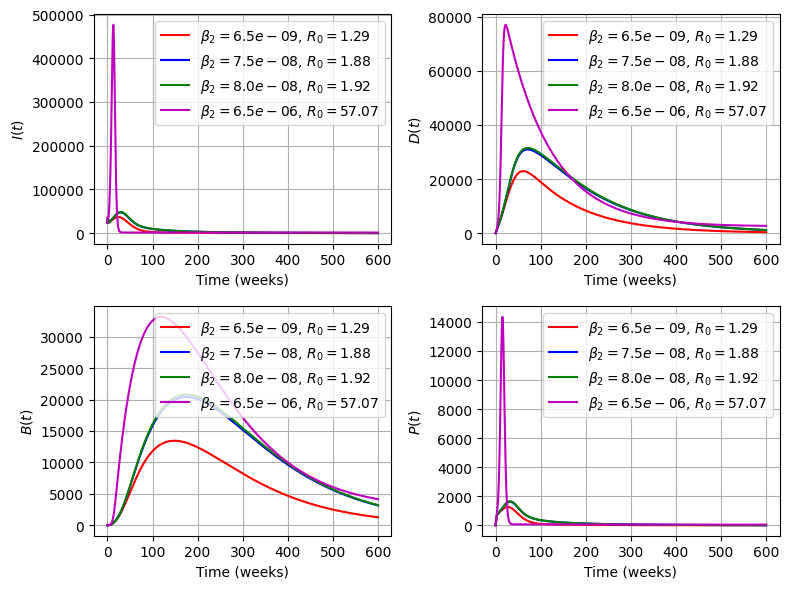

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters
guess_params = np.zeros(17)
guess_params[0] = 0.93
guess_params[1] = 0.0000000190
guess_params[2] = 0.0000000245
guess_params[3] = 0.0000000065  # Initial beta_2
guess_params[4] = 0.0000000000650
guess_params[5] = 0.00000620
guess_params[6] = 0.00990
guess_params[7] = 0.990
guess_params[8] = 0.006
guess_params[10] = 0.00010
guess_params[11] = 0.00750
guess_params[12] = 0.88000
guess_params[13] = 0.01000
guess_params[15] = 0.010
guess_params[16] = 0.50000
guess_params[9] = 0.65 * guess_params[10]
guess_params[14] = 0.95 * guess_params[13]

N = 4706097
mu = 1./(52*60.)
Delta = N * mu

Tend = 1500.
Tend = 600.
tt = np.linspace(0., Tend, 35001)


y0 = np.array([0.980 * N, 0.015 * N, 0.005 * N, 0.0000 * N, 0.0000 * N, 0.00000 * N, 0.00000 * N, 0.])

# Differential equations
def ebola_model(y, t, params):
    S, E, I, H, R, D, B, P = y
    mu = 1./(52*60.)
    Delta = N * mu
    phi_p = 0.000
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params
    Psi = beta * I + beta_1 * H + beta_2 * D + beta_3 * B + beta_p * P
    dSdt = Delta - (Psi + mu) * S
    dEdt = Psi * S - (delta + mu) * E
    dIdt = delta * E - (gamma + gamma_1 + mu) * I
    dHdt = gamma_1 * I - (eta + xi + mu) * H
    dRdt = xi * H - mu * R
    dDdt = gamma * I + eta * H - d * D
    dBdt = d * D - b * B
    dPdt = phi_p + sigma * I + eta_1 * H + d_1 * D + b_1 * B - alpha * P
    return [dSdt, dEdt, dIdt, dHdt, dRdt, dDdt, dBdt, dPdt]

# Function to compute R_0
def compute_R0(params):
    mu = 1./(52*60.)
    Delta = N * mu
    phi_p = 0.000
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params
    a1 = delta + mu
    a2 = gamma + gamma_1 + mu
    a3 = eta + xi + mu
    R0 = (beta + beta_2 * gamma / d + beta_3 * gamma / b + beta_p * sigma / alpha +
          beta_p * gamma / alpha * (d_1 / d + b_1 / b)) * Delta * delta / (mu * a1 * a2) + \
         (beta_1 + beta_2 * eta / d + beta_3 * eta / b + beta_p * eta_1 / alpha +
          beta_p * eta / alpha * (d_1 / d + b_1 / b)) * Delta * delta * gamma_1 / (mu * a1 * a2 * a3)
    return R0

# Values for beta_2
beta_2_values = [0.0000000065, 0.000000075, 0.000000080, 0.0000065]
compartments = ['I(t)', 'D(t)', 'B(t)', 'P(t)']
compartment_indices = [2, 5, 6, 7]
colors = ['r', 'b', 'g', 'm']
labels = ['$I(t)$', '$D(t)$', '$B(t)$', '$P(t)$']

results = {}
R0_values = {}
for beta_2 in beta_2_values:
    guess_params[3] = beta_2
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    results[beta_2] = sol
    R0_values[beta_2] = compute_R0(guess_params)

# Plot results
plt.figure(figsize=(8, 6))
for i, (compartment, index) in enumerate(zip(compartments, compartment_indices)):
    plt.subplot(2, 2, i + 1)
    for beta_2, color in zip(beta_2_values, colors):
        plt.plot(tt, results[beta_2][:, index], color, label=f'$\\beta_2={beta_2:.1e}$, $R_0={R0_values[beta_2]:.2f}$')
    plt.xlabel('Time (weeks)')
    plt.ylabel(labels[i])
    #plt.title(f'Compartment {labels[i]}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# for beta3

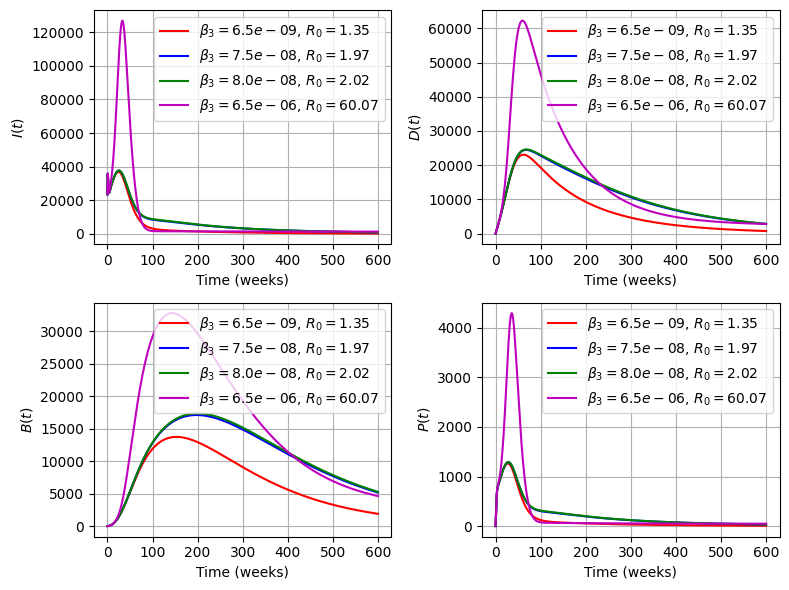

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters
guess_params = np.zeros(17)
guess_params[0] = 0.93
guess_params[1] = 0.0000000190
guess_params[2] = 0.0000000245
guess_params[3] = 0.0000000065  # beta_2
guess_params[4] = 0.0000000000650
guess_params[5] = 0.00000620
guess_params[6] = 0.00990
guess_params[7] = 0.990
guess_params[8] = 0.006
guess_params[10] = 0.00010
guess_params[11] = 0.00750
guess_params[12] = 0.88000
guess_params[13] = 0.01000
guess_params[15] = 0.010
guess_params[16] = 0.50000
guess_params[9] = 0.65 * guess_params[10]
guess_params[14] = 0.95 * guess_params[13]

N = 4706097
mu = 1./(52*60.)
Delta = N * mu

Tend = 1500.
Tend = 600.
tt = np.linspace(0., Tend, 35001)


y0 = np.array([0.980 * N, 0.015 * N, 0.005 * N, 0.0000 * N, 0.0000 * N, 0.00000 * N, 0.00000 * N, 0.])

# Differential equations
def ebola_model(y, t, params):
    S, E, I, H, R, D, B, P = y
    mu = 1./(52*60.)
    Delta = N * mu
    phi_p = 0.000
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params
    Psi = beta * I + beta_1 * H + beta_2 * D + beta_3 * B + beta_p * P
    dSdt = Delta - (Psi + mu) * S
    dEdt = Psi * S - (delta + mu) * E
    dIdt = delta * E - (gamma + gamma_1 + mu) * I
    dHdt = gamma_1 * I - (eta + xi + mu) * H
    dRdt = xi * H - mu * R
    dDdt = gamma * I + eta * H - d * D
    dBdt = d * D - b * B
    dPdt = phi_p + sigma * I + eta_1 * H + d_1 * D + b_1 * B - alpha * P
    return [dSdt, dEdt, dIdt, dHdt, dRdt, dDdt, dBdt, dPdt]

# Function to compute R_0
def compute_R0(params):
    mu = 1./(52*60.)
    Delta = N * mu
    phi_p = 0.000
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params
    a1 = delta + mu
    a2 = gamma + gamma_1 + mu
    a3 = eta + xi + mu
    R0 = (beta + beta_2 * gamma / d + beta_3 * gamma / b + beta_p * sigma / alpha +
          beta_p * gamma / alpha * (d_1 / d + b_1 / b)) * Delta * delta / (mu * a1 * a2) + \
         (beta_1 + beta_2 * eta / d + beta_3 * eta / b + beta_p * eta_1 / alpha +
          beta_p * eta / alpha * (d_1 / d + b_1 / b)) * Delta * delta * gamma_1 / (mu * a1 * a2 * a3)
    return R0

# Values for beta_3
beta_3_values = [0.0000000065, 0.000000075, 0.000000080, 0.0000065]
compartments = ['I(t)', 'D(t)', 'B(t)', 'P(t)']
compartment_indices = [2, 5, 6, 7]
colors = ['r', 'b', 'g', 'm']
labels = ['$I(t)$', '$D(t)$', '$B(t)$', '$P(t)$']

results = {}
R0_values = {}
for beta_3 in beta_3_values:
    guess_params[4] = beta_3
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    results[beta_3] = sol
    R0_values[beta_3] = compute_R0(guess_params)

# Plot results
plt.figure(figsize=(8, 6))
for i, (compartment, index) in enumerate(zip(compartments, compartment_indices)):
    plt.subplot(2, 2, i + 1)
    for beta_3, color in zip(beta_3_values, colors):
        plt.plot(tt, results[beta_3][:, index], color, label=f'$\\beta_3={beta_3:.1e}$, $R_0={R0_values[beta_3]:.2f}$')
    plt.xlabel('Time (weeks)')
    plt.ylabel(labels[i])
    #plt.title(f'Compartment {labels[i]}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# for beta_p

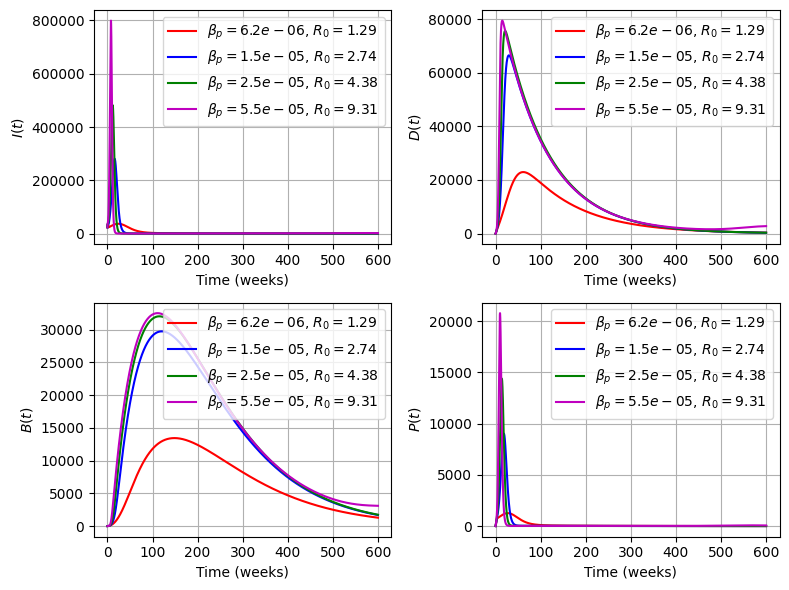

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters
guess_params = np.zeros(17)
guess_params[0] = 0.93
guess_params[1] = 0.0000000190
guess_params[2] = 0.0000000245
guess_params[3] = 0.0000000065
guess_params[4] = 0.0000000000650
guess_params[5] = 0.00000620  # beta_p
guess_params[6] = 0.00990
guess_params[7] = 0.990
guess_params[8] = 0.006
guess_params[10] = 0.00010
guess_params[11] = 0.00750
guess_params[12] = 0.88000
guess_params[13] = 0.01000
guess_params[15] = 0.010
guess_params[16] = 0.50000
guess_params[9] = 0.65 * guess_params[10]
guess_params[14] = 0.95 * guess_params[13]

N = 4706097
mu = 1./(52*60.)
Delta = N * mu

Tend = 1500.
Tend = 600.
tt = np.linspace(0., Tend, 35001)


y0 = np.array([0.980 * N, 0.015 * N, 0.005 * N, 0.0000 * N, 0.0000 * N, 0.00000 * N, 0.00000 * N, 0.])

# Differential equations
def ebola_model(y, t, params):
    S, E, I, H, R, D, B, P = y
    mu = 1./(52*60.)
    Delta = N * mu
    phi_p = 0.000
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params
    Psi = beta * I + beta_1 * H + beta_2 * D + beta_3 * B + beta_p * P
    dSdt = Delta - (Psi + mu) * S
    dEdt = Psi * S - (delta + mu) * E
    dIdt = delta * E - (gamma + gamma_1 + mu) * I
    dHdt = gamma_1 * I - (eta + xi + mu) * H
    dRdt = xi * H - mu * R
    dDdt = gamma * I + eta * H - d * D
    dBdt = d * D - b * B
    dPdt = phi_p + sigma * I + eta_1 * H + d_1 * D + b_1 * B - alpha * P
    return [dSdt, dEdt, dIdt, dHdt, dRdt, dDdt, dBdt, dPdt]

# Function to compute R_0
def compute_R0(params):
    mu = 1./(52*60.)
    Delta = N * mu
    phi_p = 0.000
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params
    a1 = delta + mu
    a2 = gamma + gamma_1 + mu
    a3 = eta + xi + mu
    R0 = (beta + beta_2 * gamma / d + beta_3 * gamma / b + beta_p * sigma / alpha +
          beta_p * gamma / alpha * (d_1 / d + b_1 / b)) * Delta * delta / (mu * a1 * a2) + \
         (beta_1 + beta_2 * eta / d + beta_3 * eta / b + beta_p * eta_1 / alpha +
          beta_p * eta / alpha * (d_1 / d + b_1 / b)) * Delta * delta * gamma_1 / (mu * a1 * a2 * a3)
    return R0

# Values for beta_p
beta_p_values = [0.00000620, 0.0000150, 0.0000250, 0.0000550]
compartments = ['I(t)', 'D(t)', 'B(t)', 'P(t)']
compartment_indices = [2, 5, 6, 7]
colors = ['r', 'b', 'g', 'm']
labels = ['$I(t)$', '$D(t)$', '$B(t)$', '$P(t)$']

results = {}
R0_values = {}
for beta_p in beta_p_values:
    guess_params[5] = beta_p
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    results[beta_p] = sol
    R0_values[beta_p] = compute_R0(guess_params)

# Plot results
plt.figure(figsize=(8, 6))
for i, (compartment, index) in enumerate(zip(compartments, compartment_indices)):
    plt.subplot(2, 2, i + 1)
    for beta_p, color in zip(beta_p_values, colors):
        plt.plot(tt, results[beta_p][:, index], color, label=f'$\\beta_p={beta_p:.1e}$, $R_0={R0_values[beta_p]:.2f}$')
    plt.xlabel('Time (weeks)')
    plt.ylabel(labels[i])
    #plt.title(f'Compartment {labels[i]}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
## PLOT FOR D and B varying beta_2

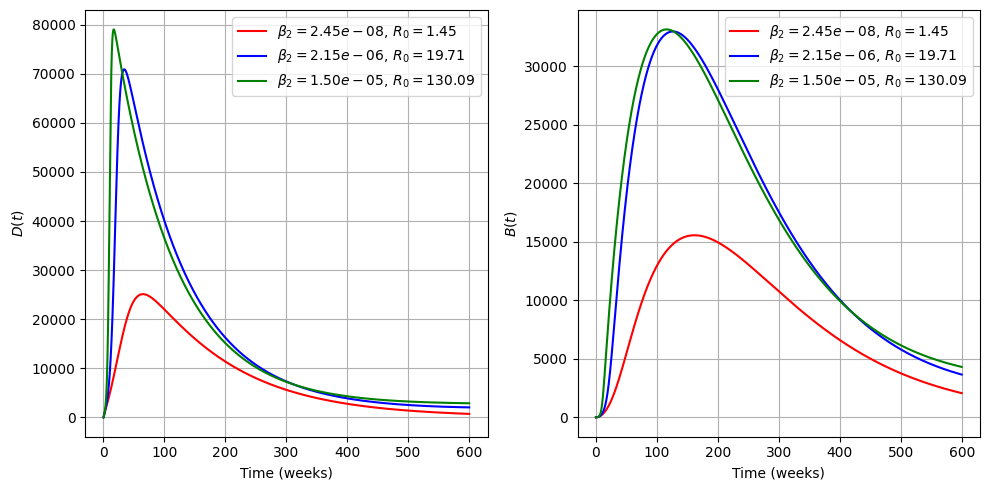

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters

guess_params = np.zeros(17)
guess_params[0] = 0.93
guess_params[1] = 0.0000000190
guess_params[2] = 0.0000000245
guess_params[3] = 0.0000000065  # beta_2
guess_params[4] = 0.0000000000650
guess_params[5] = 0.00000620
guess_params[6] = 0.00990
guess_params[7] = 0.990
guess_params[8] = 0.006
guess_params[10] = 0.00010
guess_params[11] = 0.00750
guess_params[12] = 0.88000
guess_params[13] = 0.01000
guess_params[15] = 0.010
guess_params[16] = 0.50000
guess_params[9] = 0.65 * guess_params[10]
guess_params[14] = 0.95 * guess_params[13]

N = 4706097
mu = 1./(52*60.)
Delta = N * mu


Tend = 1500.
Tend = 600.
tt = np.linspace(0., Tend, 35001)

y0 = np.array([0.980 * N, 0.015 * N, 0.005 * N, 0.0000 * N, 0.0000 * N, 0.00000 * N, 0.00000 * N, 0.])

# Differential equations
def ebola_model(y, t, params):
    S, E, I, H, R, D, B, P = y
    mu = 1./(52*60.)
    Delta = N * mu
    phi_p = 0.000
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params
    Psi = beta * I + beta_1 * H + beta_2 * D + beta_3 * B + beta_p * P
    dSdt = Delta - (Psi + mu) * S
    dEdt = Psi * S - (delta + mu) * E
    dIdt = delta * E - (gamma + gamma_1 + mu) * I
    dHdt = gamma_1 * I - (eta + xi + mu) * H
    dRdt = xi * H - mu * R
    dDdt = gamma * I + eta * H - d * D
    dBdt = d * D - b * B
    dPdt = phi_p + sigma * I + eta_1 * H + d_1 * D + b_1 * B - alpha * P
    return [dSdt, dEdt, dIdt, dHdt, dRdt, dDdt, dBdt, dPdt]

# Function to compute R_0
def compute_R0(params):
    mu = 1./(52*60.)
    Delta = N * mu
    phi_p = 0.000
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params
    a1 = delta + mu
    a2 = gamma + gamma_1 + mu
    a3 = eta + xi + mu
    R0 = (beta + beta_2 * gamma / d + beta_3 * gamma / b + beta_p * sigma / alpha +
          beta_p * gamma / alpha * (d_1 / d + b_1 / b)) * Delta * delta / (mu * a1 * a2) + \
         (beta_1 + beta_2 * eta / d + beta_3 * eta / b + beta_p * eta_1 / alpha +
          beta_p * eta / alpha * (d_1 / d + b_1 / b)) * Delta * delta * gamma_1 / (mu * a1 * a2 * a3)
    return R0

# Values for beta_2
beta_2_values = [0.0000000245, 0.00000215, 0.000015]
compartments = ['D(t)', 'B(t)']
compartment_indices = [5, 6]
colors = ['r', 'b', 'g']
labels = ['$D(t)$', '$B(t)$']

results = {}
R0_values = {}
for beta_2 in beta_2_values:
    guess_params[3] = beta_2
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    results[beta_2] = sol
    R0_values[beta_2] = compute_R0(guess_params)

# Plot results
plt.figure(figsize=(10, 5))
for i, (compartment, index) in enumerate(zip(compartments, compartment_indices)):
    plt.subplot(1, 2, i + 1)
    for beta_2, color in zip(beta_2_values, colors):
        plt.plot(tt, results[beta_2][:, index], color, label=f'$\\beta_2={beta_2:.2e}$, $R_0={R0_values[beta_2]:.2f}$')
    plt.xlabel('Time (weeks)')
    plt.ylabel(labels[i])
    #plt.title(f'Compartment {labels[i]}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
## D and B plot for varying eta

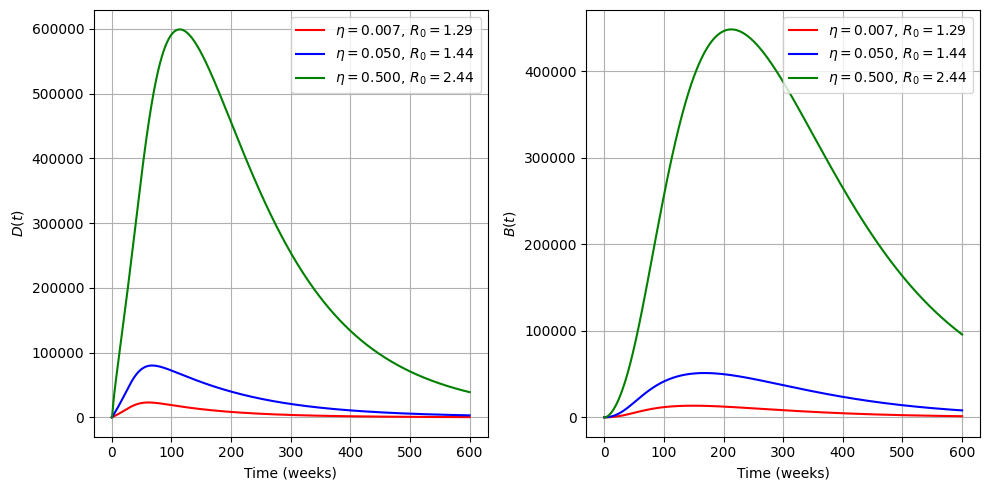

eta = 0.007, R_0 = 1.29
eta = 0.050, R_0 = 1.44
eta = 0.500, R_0 = 2.44


In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters
guess_params = np.zeros(17)
guess_params[0] = 0.93
guess_params[1] = 0.0000000190
guess_params[2] = 0.0000000245
guess_params[3] = 0.0000000065
guess_params[4] = 0.0000000000650
guess_params[5] = 0.00000620
guess_params[6] = 0.00990
guess_params[7] = 0.990
guess_params[8] = 0.006
guess_params[10] = 0.00010
guess_params[11] = 0.00750  # eta
guess_params[12] = 0.88000
guess_params[13] = 0.01000
guess_params[15] = 0.010
guess_params[16] = 0.50000
guess_params[9] = 0.65 * guess_params[10]
guess_params[14] = 0.95 * guess_params[13]

N = 4706097
mu = 1./(52*60.)
Delta = N * mu


Tend = 1500.
Tend = 600.
tt = np.linspace(0., Tend, 35001)



y0 = np.array([0.980 * N, 0.015 * N, 0.005 * N, 0.0000 * N, 0.0000 * N, 0.00000 * N, 0.00000 * N, 0.])

# Differential equations
def ebola_model(y, t, params):
    S, E, I, H, R, D, B, P = y
    mu = 1./(52*60.)
    Delta = N * mu
    phi_p = 0.000
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params
    Psi = beta * I + beta_1 * H + beta_2 * D + beta_3 * B + beta_p * P
    dSdt = Delta - (Psi + mu) * S
    dEdt = Psi * S - (delta + mu) * E
    dIdt = delta * E - (gamma + gamma_1 + mu) * I
    dHdt = gamma_1 * I - (eta + xi + mu) * H
    dRdt = xi * H - mu * R
    dDdt = gamma * I + eta * H - d * D
    dBdt = d * D - b * B
    dPdt = phi_p + sigma * I + eta_1 * H + d_1 * D + b_1 * B - alpha * P
    return [dSdt, dEdt, dIdt, dHdt, dRdt, dDdt, dBdt, dPdt]

# Function to compute R_0
def compute_R0(params):
    mu = 1./(52*60.)
    Delta = N * mu
    phi_p = 0.000
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params
    a1 = delta + mu
    a2 = gamma + gamma_1 + mu
    a3 = eta + xi + mu
    R0 = (beta + beta_2 * gamma / d + beta_3 * gamma / b + beta_p * sigma / alpha +
          beta_p * gamma / alpha * (d_1 / d + b_1 / b)) * Delta * delta / (mu * a1 * a2) + \
         (beta_1 + beta_2 * eta / d + beta_3 * eta / b + beta_p * eta_1 / alpha +
          beta_p * eta / alpha * (d_1 / d + b_1 / b)) * Delta * delta * gamma_1 / (mu * a1 * a2 * a3)
    return R0

# Values for eta
eta_values = [0.00750, 0.050, 0.50]
compartments = ['D(t)', 'B(t)']
compartment_indices = [5, 6]
colors = ['r', 'b', 'g']
labels = ['$D(t)$', '$B(t)$']

results = {}
R0_values = {}
for eta in eta_values:
    guess_params[11] = eta
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    results[eta] = sol
    R0_values[eta] = compute_R0(guess_params)

# Plot results
plt.figure(figsize=(10, 5))
for i, (compartment, index) in enumerate(zip(compartments, compartment_indices)):
    plt.subplot(1, 2, i + 1)
    for eta, color in zip(eta_values, colors):
        plt.plot(tt, results[eta][:, index], color, label=f'$\\eta={eta:.3f}$, $R_0={R0_values[eta]:.2f}$')
    plt.xlabel('Time (weeks)')
    plt.ylabel(labels[i])
    #plt.title(f'Compartment {labels[i]}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Display R_0 for each eta
for eta in eta_values:
    print(f"eta = {eta:.3f}, R_0 = {R0_values[eta]:.2f}")


In [ ]:
# ONLY I FOR VARYING beta2

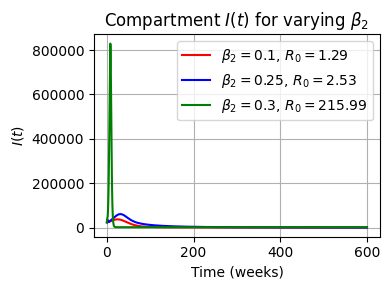

beta_2 = 6.5e-09, R_0 = 1.29
beta_2 = 1.5e-07, R_0 = 2.53
beta_2 = 2.5e-05, R_0 = 215.99


In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters
guess_params = np.zeros(17)
guess_params[0] = 0.93
guess_params[1] = 0.0000000190
guess_params[2] = 0.0000000245
guess_params[3] = 0.0000000065  # Starting value for beta_2
guess_params[4] = 0.0000000000650
guess_params[5] = 0.00000620
guess_params[6] = 0.00990
guess_params[7] = 0.990
guess_params[8] = 0.006
guess_params[10] = 0.00010
guess_params[11] = 0.00750
guess_params[12] = 0.88000
guess_params[13] = 0.01000
guess_params[15] = 0.010
guess_params[16] = 0.50000
guess_params[9] = 0.65 * guess_params[10]
guess_params[14] = 0.95 * guess_params[13]

N = 4706097
mu = 1./(52*60.)
Delta = N * mu

Tend = 1500.
Tend = 600.
tt = np.linspace(0., Tend, 35001)



y0 = np.array([0.980 * N, 0.015 * N, 0.005 * N, 0.0000 * N, 0.0000 * N, 0.00000 * N, 0.00000 * N, 0.])

# Differential equations
def ebola_model(y, t, params):
    S, E, I, H, R, D, B, P = y
    mu = 1./(52*60.)
    Delta = N * mu
    phi_p = 0.000
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params
    Psi = beta * I + beta_1 * H + beta_2 * D + beta_3 * B + beta_p * P
    dSdt = Delta - (Psi + mu) * S
    dEdt = Psi * S - (delta + mu) * E
    dIdt = delta * E - (gamma + gamma_1 + mu) * I
    dHdt = gamma_1 * I - (eta + xi + mu) * H
    dRdt = xi * H - mu * R
    dDdt = gamma * I + eta * H - d * D
    dBdt = d * D - b * B
    dPdt = phi_p + sigma * I + eta_1 * H + d_1 * D + b_1 * B - alpha * P
    return [dSdt, dEdt, dIdt, dHdt, dRdt, dDdt, dBdt, dPdt]

# Function to compute R_0
def compute_R0(params):
    mu = 1./(52*60.)
    Delta = N * mu
    phi_p = 0.000
    delta, beta, beta_1, beta_2, beta_3, beta_p, gamma, gamma_1, sigma, b_1, d_1, eta, xi, d, b, eta_1, alpha = params
    a1 = delta + mu
    a2 = gamma + gamma_1 + mu
    a3 = eta + xi + mu
    R0 = (beta + beta_2 * gamma / d + beta_3 * gamma / b + beta_p * sigma / alpha +
          beta_p * gamma / alpha * (d_1 / d + b_1 / b)) * Delta * delta / (mu * a1 * a2) + \
         (beta_1 + beta_2 * eta / d + beta_3 * eta / b + beta_p * eta_1 / alpha +
          beta_p * eta / alpha * (d_1 / d + b_1 / b)) * Delta * delta * gamma_1 / (mu * a1 * a2 * a3)
    return R0

# Values for beta_2
beta_2_values = [0.0000000065, 0.00000015, 0.000025]
compartment_index = 2  # Index for I(t) in the solution vector
colors = ['r', 'b', 'g']
labels = ['$\\beta_2=0.1$', '$\\beta_2=0.25$', '$\\beta_2=0.3$']

results = {}
R0_values = {}
for beta_2 in beta_2_values:
    guess_params[3] = beta_2
    sol = odeint(ebola_model, y0, tt, args=(guess_params,))
    results[beta_2] = sol
    R0_values[beta_2] = compute_R0(guess_params)

# Plot results for I(t)
plt.figure(figsize=(4, 3))
for beta_2, color, label in zip(beta_2_values, colors, labels):
    plt.plot(tt, results[beta_2][:, compartment_index], color, label=f'{label}, $R_0={R0_values[beta_2]:.2f}$')
plt.xlabel('Time (weeks)')
plt.ylabel('$I(t)$')
plt.title('Compartment $I(t)$ for varying $\\beta_2$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display R_0 for each beta_2
for beta_2 in beta_2_values:
    print(f"beta_2 = {beta_2}, R_0 = {R0_values[beta_2]:.2f}")
